In [22]:
%matplotlib inline

In [12]:
import pandas as pd
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')

In [4]:
X = train[train.columns[1:]]
y = train['Activity']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=37)

In [68]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 0.3,
    'silent': 1.0,
    'n_estimators': 133
}

In [69]:
bst = XGBClassifier(**params).fit(X_train, y_train)

In [70]:
bst.score(X_test, y_test)

0.77302100161550891

# Analyze

In [24]:
import seaborn as sns
sns.set(font_scale = 1.5)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.learning_curve import validation_curve

In [31]:
cv = StratifiedKFold(n_splits=10, random_state=37, shuffle=True)

In [72]:
default_params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 0.3,
    'silent': 1.0
}

n_estimators_range = np.linspace(1, 200, 10).astype('int')

train_scores, test_scores = validation_curve(
    XGBClassifier(**default_params),
    X, y,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv.split(X, y),
    scoring='accuracy'
)

In [73]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

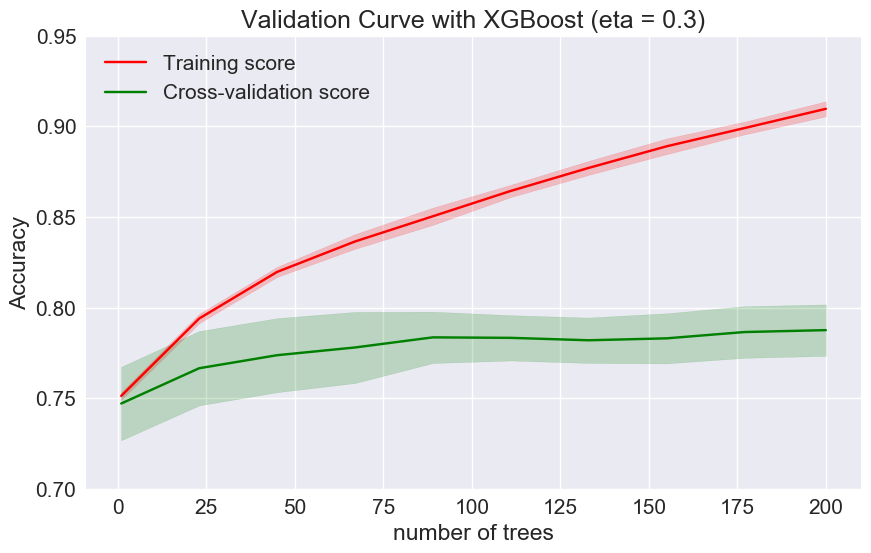

In [79]:
fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.95)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean, 
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

In [80]:
i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

Best cross-validation result (0.79) obtained for 200 trees


In [76]:
test_scores_mean[i]

0.78752677210149058

# Save 

In [81]:
test_X = pd.read_csv('test.csv')

In [83]:
probas = bst.predict_proba(test_X.values)

In [84]:
solution = pd.DataFrame(probas[:, 1], range(1, len(probas)+1), columns=['PredictedProbability'])

In [85]:
solution.head()

,PredictedProbability
1,0.968463
2,0.943887
3,0.335840
4,0.908191
5,0.046781


In [86]:
solution.to_csv('solution.csv', index_label=['MoleculeId'])